# Exemplo de reamostragem das partículas

In [18]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



## Criação das partículas e do robô

In [19]:
particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot  

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

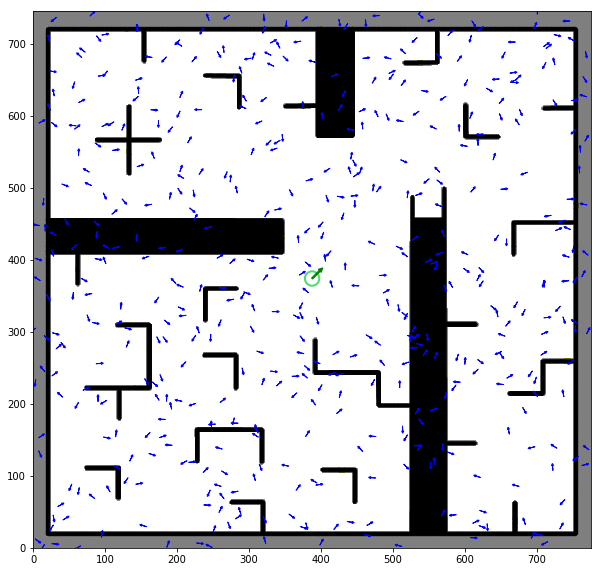

In [20]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

#norm.pdf(zj,loc = zˆj, scale = (sigma 2 a 7cm))

#TROCAR POR SOMA

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[644.9167452775022, 287.1909462212524, 5.979577523011626],
 [662.427136999875, 310.47860935206506, 5.295608640523808],
 [381.137740364312, 215.20341186910323, 4.866071443278233],
 [4.001632982286693, 156.01661786830186, 1.4353934213270503],
 [413.0991735908656, 741.2833116844214, 1.1401666807728257],
 [446.0763361377519, 201.86152575975115, 1.0644275841946924],
 [569.9641620252147, 460.17803778825595, 4.9511169645433135],
 [277.6652452171099, 77.15975903101398, 1.8145460410304126],
 [401.23550559031156, 308.4313375745248, 2.669398790058205],
 [767.5894067723433, 359.3163233195829, 2.6463089915370794],
 [740.7421568991946, 707.9354004273773, 0.5881328669201535],
 [702.2709328307512, 176.9899841257281, 1.6286156122220161],
 [250.78601675744054, 392.4069609950311, 2.2247387486871038],
 [242.84277795988987, 173.4158094499402, 4.862030289539154],
 [558.4366166988283, 131.1422748939558, 4.821871249377227],
 [463.52424392483186, 438.38638575799683, 4.107980196265623],
 [744.0760122908063, 60

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[644.9167452775022, 287.1909462212524, 5.979577523011626],
 [4.001632982286693, 156.01661786830186, 1.4353934213270503],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [277.6652452171099, 77.15975903101398, 1.8145460410304126],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [644.9167452775022, 287.1909462212524, 5.979577523011626],
 [644.9167452775022, 287.1909462212524, 5.979577523011626]]

![](animated.gif)